程式設計：歐尼克斯實境互動工作室 [http://omnixri.blogspot.com/](http://omnixri.blogspot.com/)

OmniXRI Jack 2020/12/4





# **如何在Colab上顯示雲端硬碟(Google Drive)上的影像和視頻**

1. 將欲存取的檔案自行上傳到雲端硬碟(Google Drive)
2. 掛載自己的Google Drive
3. 選擇習慣之影像顯示方式

*   方法1.1 透過matplotlib show()顯示
*   方法1.2 透過IPython.display及PIL顯示
*   方法1.3 以Colab自帶cv2_imshow()函式顯示

4. 選擇習慣之視頻顯示方式

*   方法2.1 透過IPython.display HTML()及base64 b64encode()函式庫顯示視頻
*   方法2.2 利用ffmpeg處理OpenCV VideoWriter()產出視頻播放問題

In [16]:
# 導入Google Drvie套件包
from google.colab import drive

# 將自己的雲端硬碟掛載到Colab虛擬機上
# 參考資料來源:https://colab.research.google.com/drive/1i41Whco5KIb7EuntKYwTVORAkAwCmlkF
drive.mount('/content/gdriver')

# 點選 Go to this URL in a browser: 後的網址，並複製授權碼(Authorization Code)
# 貼到到下方 Authorization Code 空格位置
# 雲端硬碟成功掛載到Colab虛擬機下 /content/gdriver/MyDrive 
# 點選畫面左方檔案夾圖示亦能看到掛載結果

# 本範例測試用影像OmniXRI_Logo.jpg及視頻OmniXRI_Logo.mp4存放在雲端硬碟 /test 路徑下
# 可自行準備不同檔名的檔案存放在自定義路徑下
# 以下範例須自行修改成自己準備好的路徑及檔案名稱

# 列出存放測試檔案的目錄清單
!ls gdriver/MyDrive/test

Drive already mounted at /content/gdriver; to attempt to forcibly remount, call drive.mount("/content/gdriver", force_remount=True).
OmniXRI_Logo_avc.mp4  OmniXRI_Logo.jpg	OmniXRI_Logo.mp4  OmniXRI_Logo_out.mp4


# **方法1.1：透過matplotlib show()顯示**

優點是可彈性顯示大小或多個子視窗同時顯示並可加上標題說明。

缺點是色彩表示方式是RGB888和OpenCV的BGR88相反，需以OpenCV cvtColor()轉換色彩，否則顯示顏色會錯亂。

In [17]:
!ls gdriver/MyDrive/OmniXRI_Logo.jpg

ls: cannot access 'gdriver/MyDrive/OmniXRI_Logo.jpg': No such file or directory


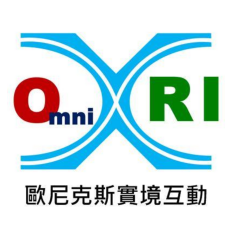

In [18]:
import cv2 # 導入OpenCV函式庫
import matplotlib.pyplot as plt # 導入matplotlib.pyplot函式庫

img1 = cv2.imread('gdriver/MyDrive/test/OmniXRI_Logo.jpg') #讀入掛載之雲端硬碟中的影像檔
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # 將影像色彩空間從 BGR888 轉成 RGB888

# plt.figure(figsize=(10,10)) # 設定顯示尺寸
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(img2) # 繪製單張影像
plt.show() # 顯示影像

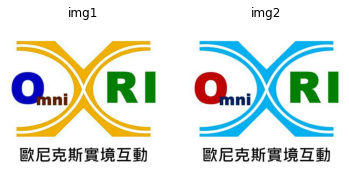

In [19]:
titles = ['img1', 'img2'] # 設定影像標題
images = [img1, img2] # 設定顯示影像

#繪製多張影像
for i in range(2): 
  plt.subplot(1,2,i+1) # 指定子圖繪製位置
  plt.imshow(images[i]) # 繪製單張影像
  plt.title(titles[i]) # 顯示影像標題
  plt.axis("off") # 設定關閉XY軸刻尺
plt.show()

# **方法1.2：透過IPython.display及PIL顯示**

優點可整合PIL相關函式。

缺點是色彩表示方式是RGB888和OpenCV的BGR88相反，需以OpenCV cvtColor()轉換色彩，否則顯示顏色會錯亂。

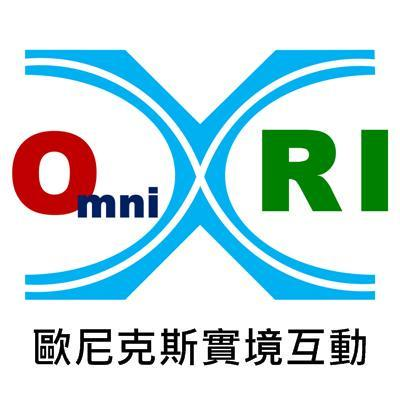

In [20]:
from PIL import Image # 導入PIL Image函式庫
from IPython.display import display, clear_output # 導入IPython.display display, clear_output函式庫

img3 = cv2.imread('gdriver/MyDrive/test/OmniXRI_Logo.jpg') #讀入掛載之雲端硬碟中的影像檔
img4 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # 將影像色彩空間從 BGR888 轉成 RGB888

display(Image.fromarray(img4)) # 顯示影像

# **方法1.3：以Colab自帶cv2_imshow()函式顯示**

優點可直接顯示OpenCV BGR888格式，不用轉換色彩空間。

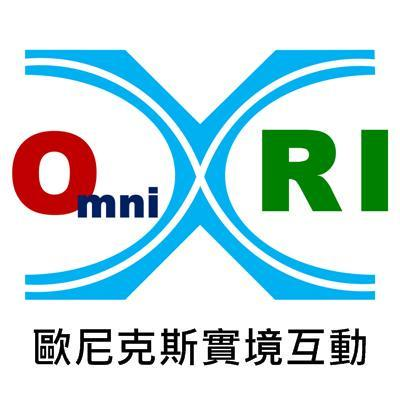

In [21]:
from google.colab.patches import cv2_imshow # 導入Colab.patches函式庫

img5 = cv2.imread('gdriver/MyDrive/test/OmniXRI_Logo.jpg') #讀入掛載之雲端硬碟中的影像檔
cv2_imshow(img5) # 顯示影像

# **方法2.1：透過IPython.display HTML()及base64 b64encode()函式庫顯示視頻**
在Colab中無法以連續單張顯示的方法播放視頻，這裡用IPython.display的HTML函式即可在線上顯示影片結果，以下範例以一個H.264(avc)格式的mp4檔案進行測試。

In [22]:
from IPython.display import HTML # 導入IPython.display HTML函式庫
from base64 import b64encode # 導入base64 baseencode函式庫

vs1 = open('gdriver/MyDrive/test/OmniXRI_Logo.mp4','rb').read() # 開啟並讀取mp4格式視頻檔
data_url = "data:video/mp4;base64," + b64encode(vs1).decode() # 設定顯示內容格式
HTML(f'<video width=400 controls><source src={data_url} type="video/mp4"></video>') # 將視頻顯示於視窗上

# **方法2.2：利用ffmpeg處理OpenCV VideoWriter()產出視頻播放問題**
一般OpenCV是以VideoCapture()來讀取及輸出視頻檔案，但在Colab上無法直接顯示，只能把輸出的檔案存回雲端硬碟上，再以其它工具開啟顯示。

OpenCV目前產出的mp4格式為mpv4格式，無法在Colab上顯示，所以要用ffmpeg將mpv4格式的mp4檔案轉成avc格式的mp4檔案，才能直接顯示。

以下範例利用OpenCV VideoCapture() 讀取視頻檔案，將每個影格左上角加入一個 Output 黃色字樣，再利用 VideoWriter() 寫入視頻檔案。最後利用ffmpeg將產出轉換成Colab可以播放的格式，並用方法2.1進行線上顯示視頻。

In [23]:
from IPython.display import HTML # 導入IPython.display HTML函式庫
from base64 import b64encode # 導入base64 baseencode函式庫
import cv2 # 導入OpenCV函式庫

v_in = 'gdriver/MyDrive/test/OmniXRI_Logo.mp4' # 指定輸入視頻名稱
v_out = 'gdriver/MyDrive/test/OmniXRI_Logo_out.mp4' # 指定輸出視頻名稱

cap = cv2.VideoCapture(v_in) # 讀取視頻檔案
video_w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # 讀影視頻影格寬度
video_h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # 讀取視頻影格高度
video_c = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # 讀取視頻影格數量
print (f'video width : {video_w}') # 列出影格寬度
print (f'video height : {video_h}') # 列出影格高度
print (f'frame count : {video_c}') # 列出影格數量

fourcc = cv2.VideoWriter_fourcc(*'XVID') # 指定輸出視頻格式，*'XVID' 或 *'MPV4' 皆可產出
writer = cv2.VideoWriter(v_out, fourcc, 30, (video_w, video_h)) # 指定寫入名稱、格式、速度(FPS)、尺寸

i = 0 # 清除執行影格數量
while(cap.isOpened()): # 若影片開啟正常則啟動循環
  ret, frame = cap.read() # 讀取一個影格

  if ret == True: # 若影格讀取正常
    # 在影格左上角加上一個'Output'黃色字樣
    frame = cv2.putText(frame, "Output", (30,30), cv2.FONT_HERSHEY_COMPLEX, 1.0, (0,255,255), 1,cv2.LINE_AA)
    writer.write(frame) # 將影格寫入輸出視頻檔案中
    i = i+1 # 執行影格數量加一
  else : # 若已讀不到影格
    print(f'count : {i}') # 列出總共執行影格數量
    break # 結束循環

cap.release() # 釋放影像擷取資源
writer.release() # 釋放影像寫入資源
print('done') # 列出結束訊息

# 以ffmpeg將mpv4格式的mp4檔案轉成一般品質avc格式的mp4檔案
!ffmpeg -i gdriver/MyDrive/test/OmniXRI_Logo_out.mp4 -acodec libx264 gdriver/MyDrive/test/OmniXRI_Logo_avc.mp4

vs_out = open(v_avc,'rb').read() # 開啟並讀取mp4格式視頻檔
data_url = "data:video/mp4;base64," + b64encode(vs_out).decode() # 設定顯示內容格式
HTML(f'<video width=400 controls><source src={data_url} type="video/mp4"></video>') # 將視頻顯示於視窗上

video width : 1280
video height : 720
frame count : 150
count : 150
done
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enabl